In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv("Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [5]:
data.shape

(568411, 10)

In [6]:
score_unique = data['Score'].unique()
print(score_unique)

[5 1 4 2 3]


In [7]:
# 0-> Negative Review
# 1-> Neutral Review
# 2-> Positive Review
a=[]
for i in data['Score']:
    if i<3:
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

In [8]:
r_0, r_1, r_2=0, 0, 0
for i in a:
    if i==0:
        r_0+=1
    elif i==1:
        r_1+=1
    else:
        r_2+=1

print('Negative Reviews:',r_0)
print('Neutral Reviews:',r_1)
print('Positive Reviews:',r_2)        

Negative Reviews: 82007
Neutral Reviews: 42638
Positive Reviews: 443766


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


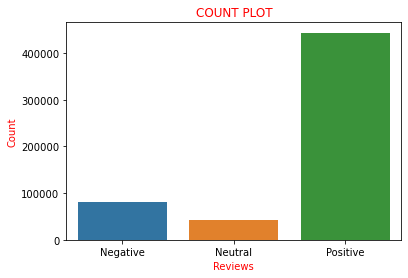

In [9]:
sns.countplot(a)
plt.xlabel('Reviews',color='red')
plt.ylabel('Count',color='red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color='r')
plt.show()

In [10]:
data['sentiment'] = a

final_dataset = data[['Text','sentiment']]

In [11]:
data_p = final_dataset[data['sentiment']==2]
data_n = final_dataset[data['sentiment']==0]
len(data_p), len(data_n)

(443766, 82007)

In [12]:
data_p.head()

,Text,sentiment
0,I have bought several of the Vitality canned d...,2
2,This is a confection that has been around a fe...,2
4,Great taffy at a great price. There was a wid...,2
5,I got a wild hair for taffy and ordered this f...,2
6,This saltwater taffy had great flavors and was...,2


In [13]:
data_n.head()

,Text,sentiment
1,Product arrived labeled as Jumbo Salted Peanut...,0
3,If you are looking for the secret ingredient i...,0
12,My cats have been happily eating Felidae Plati...,0
16,I love eating them and they are good for watch...,0
26,"The candy is just red , No flavor . Just plan...",0


In [14]:
datap = data_p.iloc[np.random.randint(1,44366,5000), :]
datan = data_n.iloc[np.random.randint(1, 82007,5000), :]
len(datan), len(datap)

(5000, 5000)

In [15]:
data = pd.concat([datap,datan])
len(data)

10000

In [16]:
c=[]
for i in data['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


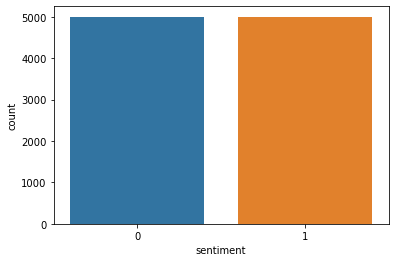

In [17]:
sns.countplot(data['sentiment'])
plt.show()

In [18]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['Text'].apply(strip_html)

data = data.drop('Text',axis=1)
data['review']

49061     "Lemon Lift" is a refreshing and slightly spic...
47023     I have spent the better of my adult life chasi...
7220      I thought these had avery good flavor.  I took...
1757      I recently received the variety packs of popch...
28890     I got the product in time and it is exactly wh...
                                ...                        
146957    I bought this from Amazon since they don't hav...
245789    12 out of 24 units is not an assortment.  Deca...
119788    I bought this product based on online reviews....
472050    Usually I buy freeze dried pears from whole fo...
555434    I bought it for my father who just came out of...
Name: review, Length: 10000, dtype: object

# Model Building

In [19]:
import nltk
def punc_clean(text):
    import string as st
    a = [w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head()

,sentiment,review
49061,1,Lemon Lift is a refreshing and slightly spicy ...
47023,1,I have spent the better of my adult life chasi...
7220,1,I thought these had avery good flavor I took ...
1757,1,I recently received the variety packs of popch...
28890,1,I got the product in time and it is exactly wh...


In [20]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer() #(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])
vect_X = vectr.transform(data['review'])

In [22]:
#import nltk
#nltk.download()

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
clf=model.fit(vect_X,data['sentiment'])
clf.score(vect_X,data['sentiment'])*100

93.44

# Prediction

In [24]:
pred1=clf.predict(vectr.transform([''' how great he is ''']))

In [25]:
pred2=clf.predict(vectr.transform(['''low quality''']))

In [26]:
pred1[0]

1